In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df_final = pd.read_csv("FINAL_USO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
df_final.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000  ...   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996  ...   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001  ...   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000  ...   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998  ...   

              GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open  \
Date                                                                     
2011-12-15  51.570000  51.680000      48.973877    20605600  36.900002   
2011-12-16  52.040001  52.680000      49.921513    16285400  36.180000   
2011-12-19  51.029999  51.169998      48.490578    15120200  36.389999   
2011-12-20  52.369999  52.990002      50.215282    11644900  37.299999   
2011-12-21  52.419998  52.959999      50.186852     8724300  37.669998   

             USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Date                                                                    
2011-12-15  36.939999  36.049999  36.130001      36.130001    12616700  
2011-12-16  36.500000  35.730000  36.270000      36.270000    12578800  
2011-12-19  36.450001  35.930000  36.200001      36.200001     7418200  
2011-12-20  37.610001  37.220001  37.560001      37.560001    10041600  
2011-12-21  38.240002  37.520000  38.110001      38.110001    10728000  

[5 rows x 80 columns]

In [5]:
df_final.shape

(1718, 80)

In [6]:
df_final.describe()

Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  ...  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000  ...   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222  ...   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999  ...   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001  ...   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500  ...   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529999  ...   
75%    1.020795e+07   237.292500   237.722500   236.147503   236.889996  ...   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987  ...   

           GDX_Low    GDX_Close  GDX_Adj Close    GDX_Volume     USO_Open  \
count  1718.000000  1718.000000    1718.000000  1.718000e+03  1718.000000   
mean     26.384575    26.715012      25.924624  4.356515e+07    22.113417   
std      10.490908    10.603110       9.886570  2.909151e+07    11.431056   
min      12.400000    12.470000      12.269618  4.729000e+06     7.820000   
25%      20.355000    20.585000      20.180950  2.259968e+07    11.420000   
50%      22.870001    23.054999      22.677604  3.730465e+07    16.450000   
75%      26.797500    27.317500      26.478154  5.697055e+07    34.419998   
max      56.770000    57.470001      54.617039  2.321536e+08    41.599998   

          USO_High      USO_Low    USO_Close  USO_Adj Close    USO_Volume  
count  1718.000000  1718.000000  1718.000000    1718.000000  1.718000e+03  
mean     22.307148    21.904657    22.109051      22.109051  1.922313e+07  
std      11.478671    11.373997    11.432787      11.432787  1.575743e+07  
min       8.030000     7.670000     7.960000       7.960000  1.035100e+06  
25%      11.500000    11.300000    11.392500      11.392500  6.229500e+06  
50%      16.635001    16.040000    16.345000      16.345000  1.613015e+07  
75%      34.667499    34.110000    34.417499      34.417499  2.672375e+07  
max      42.299999    41.299999    42.009998      42.009998  1.102657e+08  

[8 rows x 80 columns]

In [7]:
df_final.isnull().values.any()

False

<function matplotlib.pyplot.show(close=None, block=None)>

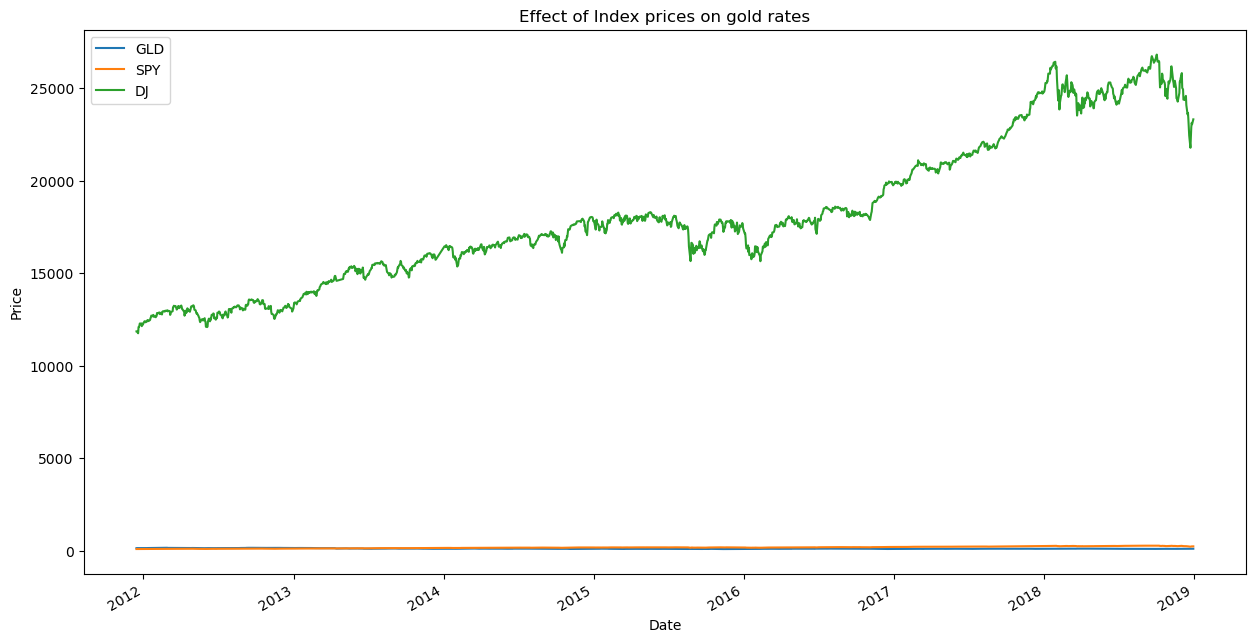

In [8]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show

In [9]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

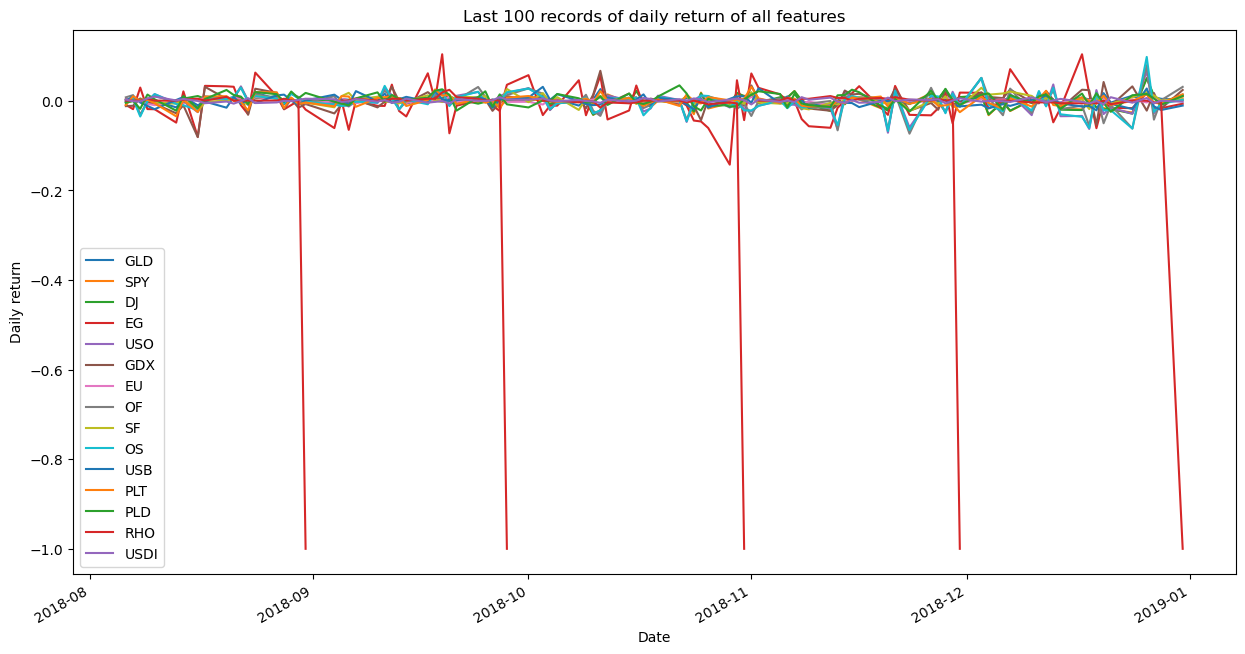

In [10]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']
EG_adj_close =  df_final['EG_Ajclose']
USO_Adj_close = df_final['USO_Adj Close']
GDX_Adj_close = df_final['GDX_Adj Close']
EU_price      = df_final['EU_Price']
OF_price      = df_final['OF_Price']
OS_price      = df_final['OS_Price']
SF_price      = df_final['SF_Price']
USB_price      = df_final['USB_Price']
PLT_price      = df_final['PLT_Price']
PLD_price      = df_final['PLD_Price']
rho_price      = df_final['RHO_PRICE']
usdi_price      = df_final['USDI_Price']



GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)

df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_Adj_return,
                  'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                  'RHO':rho_price,'USDI':USDI_price})

daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

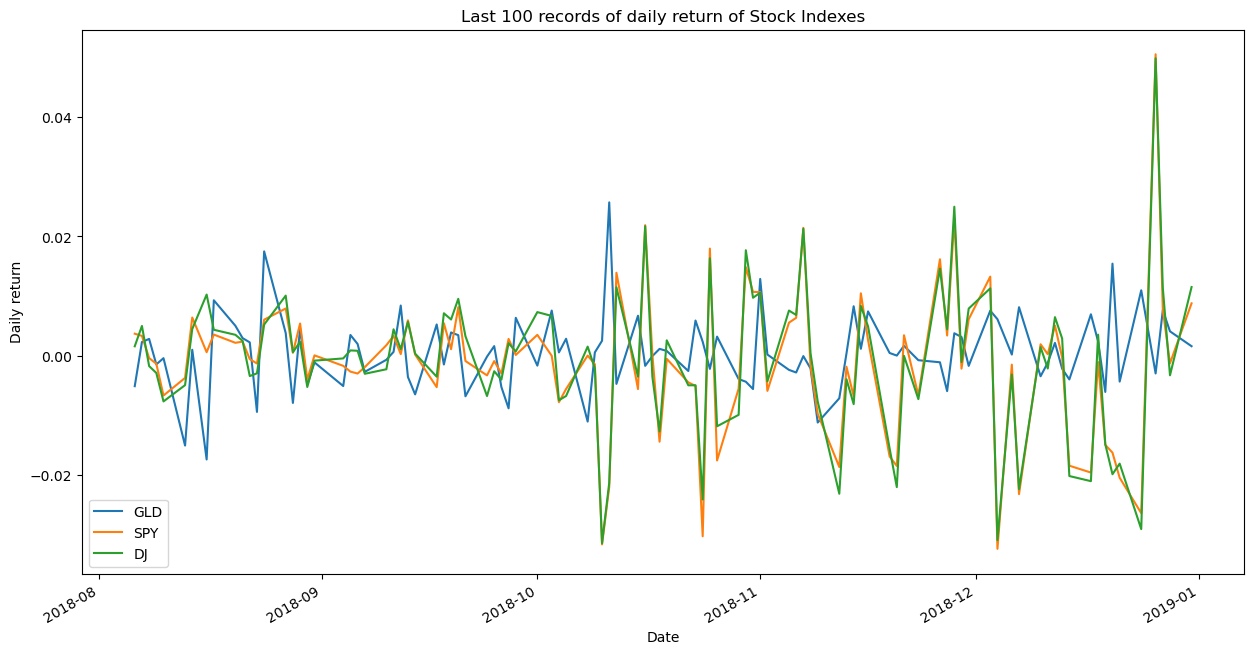

In [11]:
df_s = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return})

daily_ax = df_s[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

<Axes: xlabel='SPY', ylabel='GLD'>

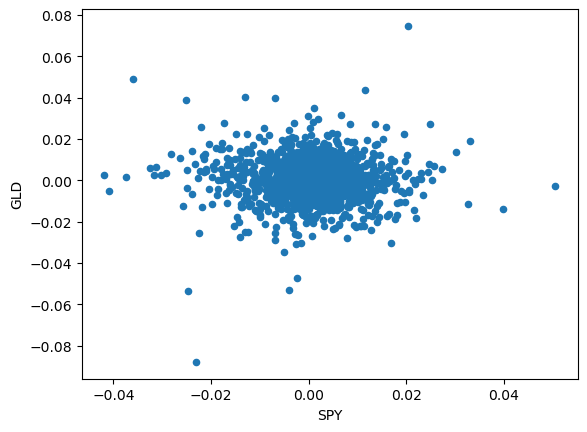

In [12]:
df_d.plot(kind='scatter', x='SPY', y='GLD')

<Axes: xlabel='DJ', ylabel='GLD'>

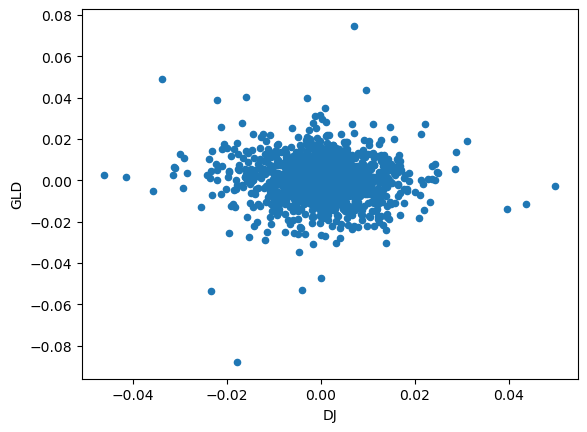

In [13]:
df_d.plot(kind='scatter', x='DJ', y='GLD')


<Axes: xlabel='EG', ylabel='GLD'>

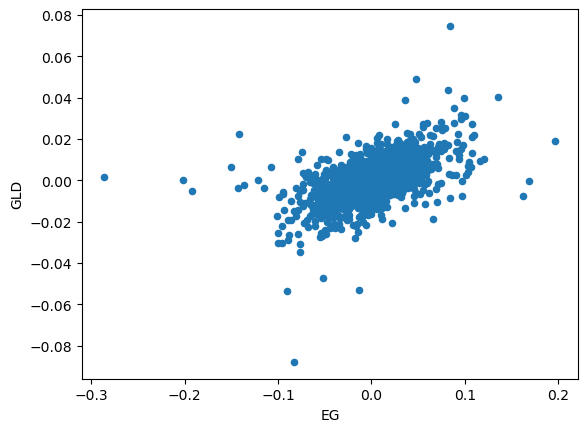

In [14]:
df_d.plot(kind='scatter', x='EG', y='GLD')

Mean= -8.65698612128203e-05
Standard Deviation= 0.00961153616700639
Kurtosis= 8.606584924918355


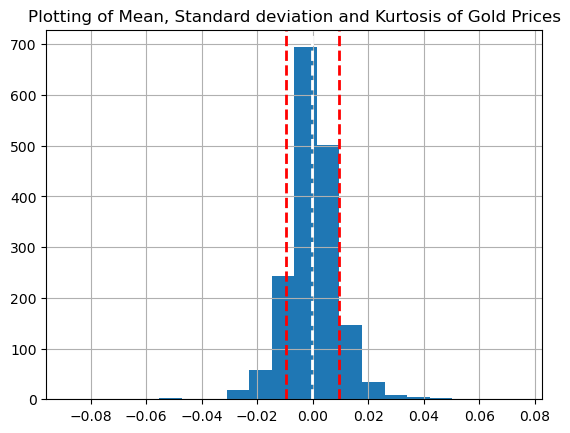

In [15]:
mean=df_d['GLD'].mean()
# computing standard deviation of Gold stock
std=df_d['GLD'].std()
kurt=df_d['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

Mean= 0.0005366024364688835
Standard Deviation= 0.008262309911393526
Kurtosis= 3.4557859039745233


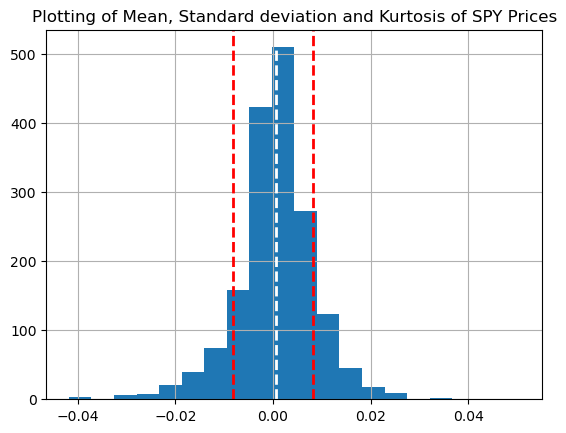

In [16]:
mean=df_d['SPY'].mean()
# computing standard deviation of Gold stock
std=df_d['SPY'].std()
kurt=df_d['SPY'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['SPY'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of SPY Prices")
plt.show()

Mean= 0.0004266395218751805
Standard Deviation= 0.00815178011451231
Kurtosis= 3.832719336260695


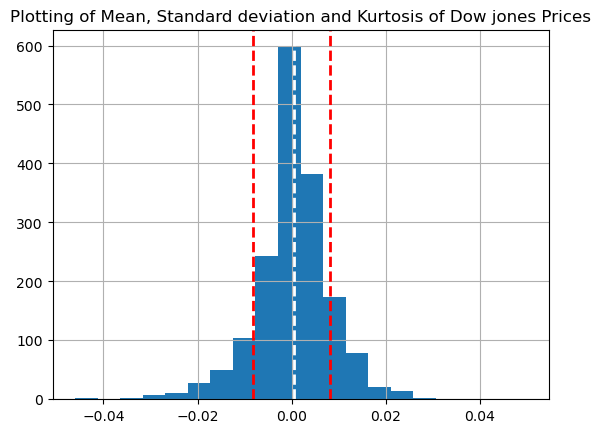

In [17]:
# computing mean,standard deviation and kurtosis of Dow Jones Index daily return
mean=df_d['DJ'].mean()
# computing standard deviation of Gold stock
std=df_d['DJ'].std()
kurt=df_d['DJ'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['DJ'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Dow jones Prices")
plt.show()

<Axes: >

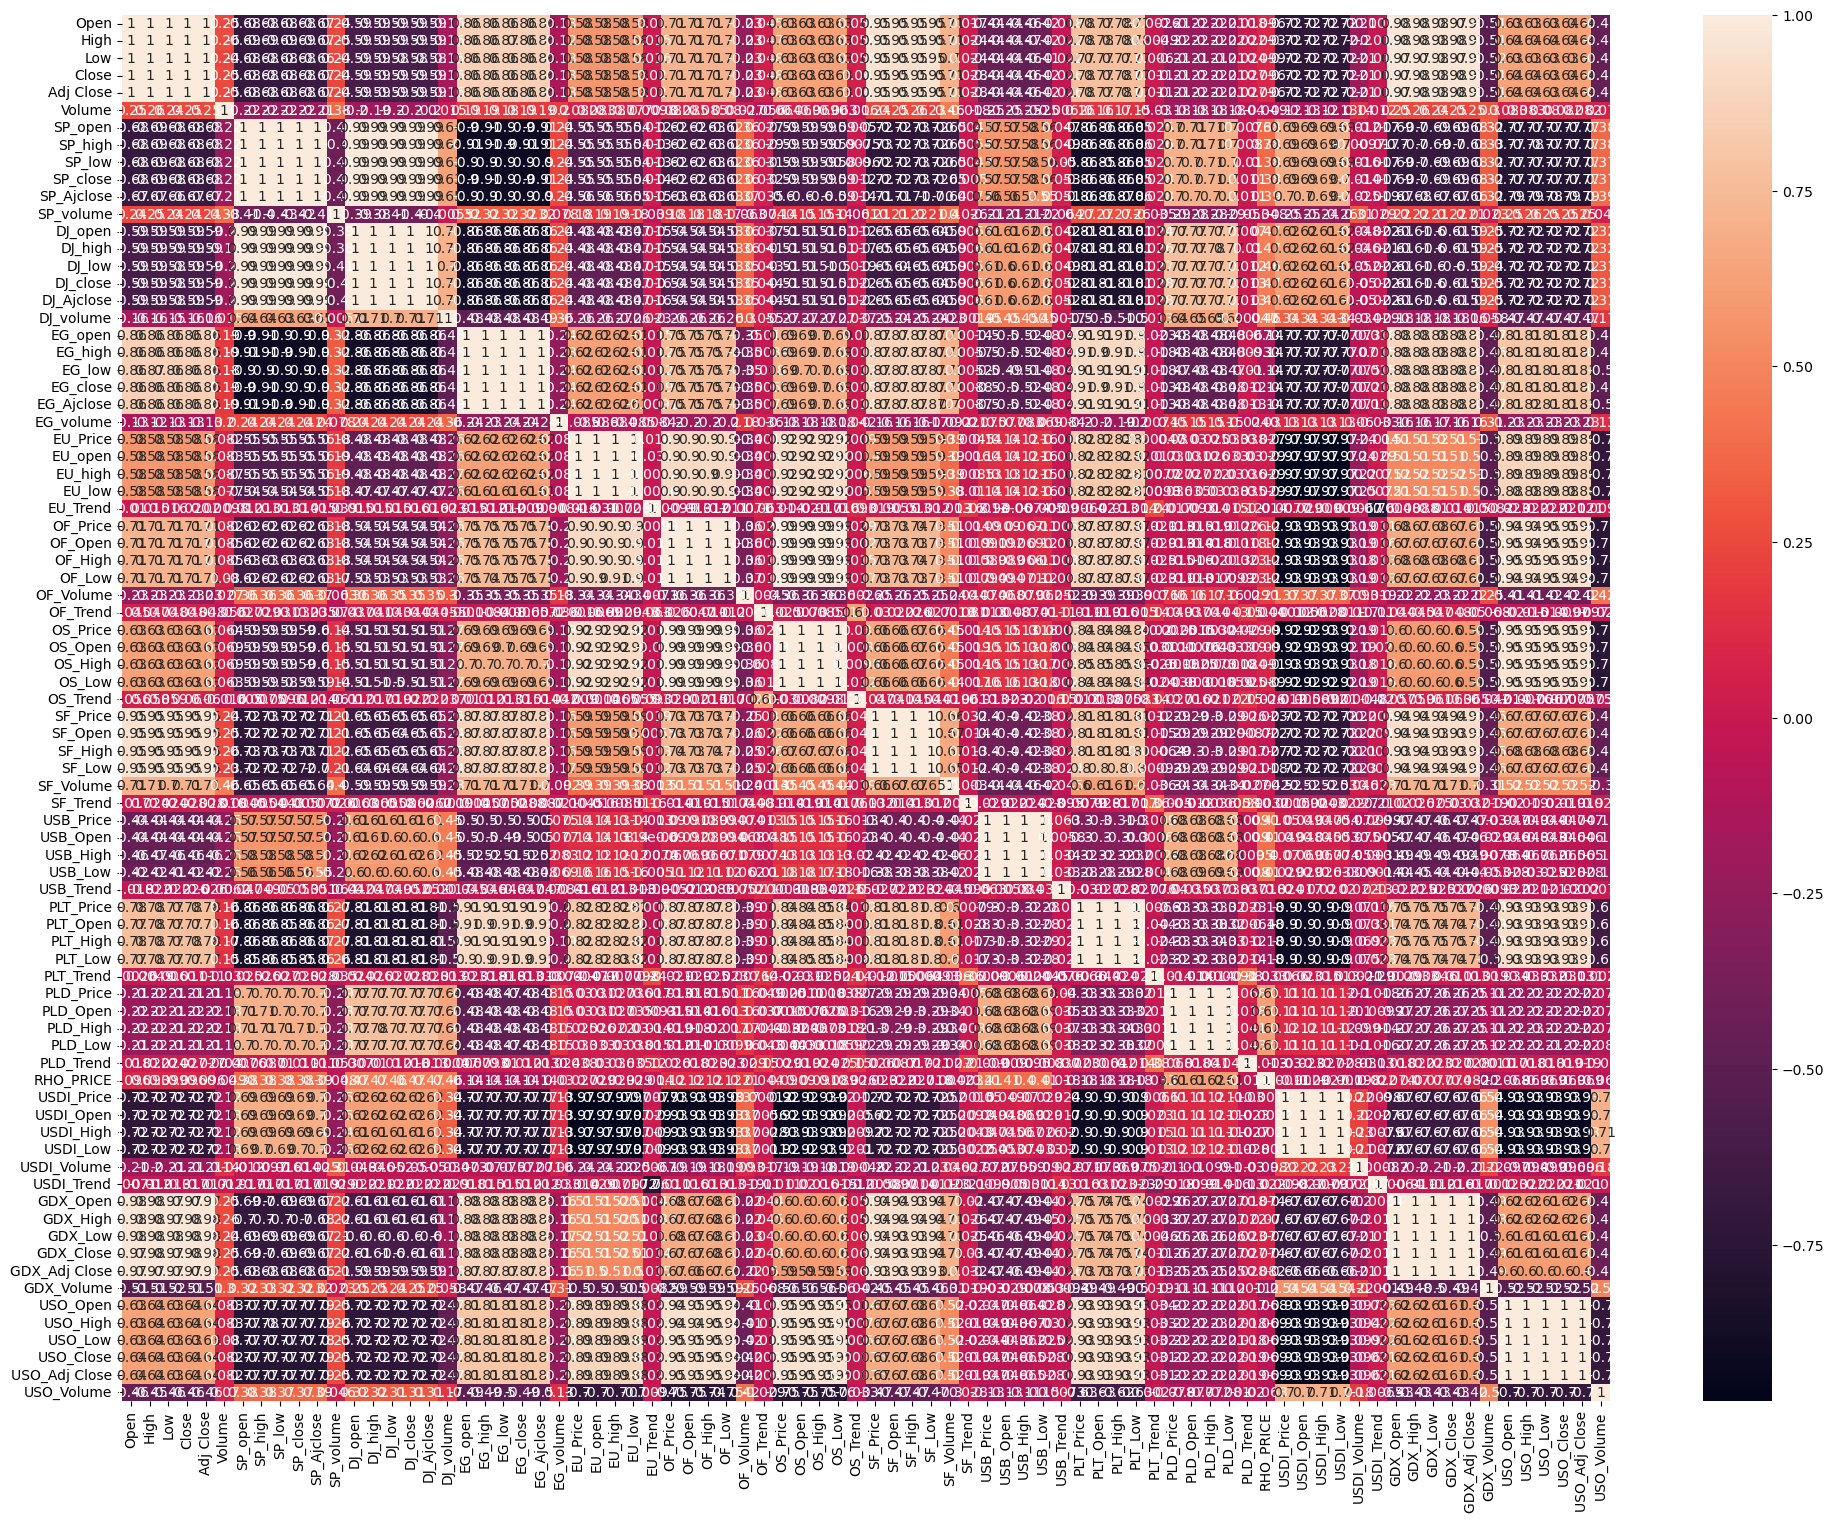

In [18]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_final.corr(), annot=True) 

In [19]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<Axes: title={'center': 'Correlation with Adj Close'}>

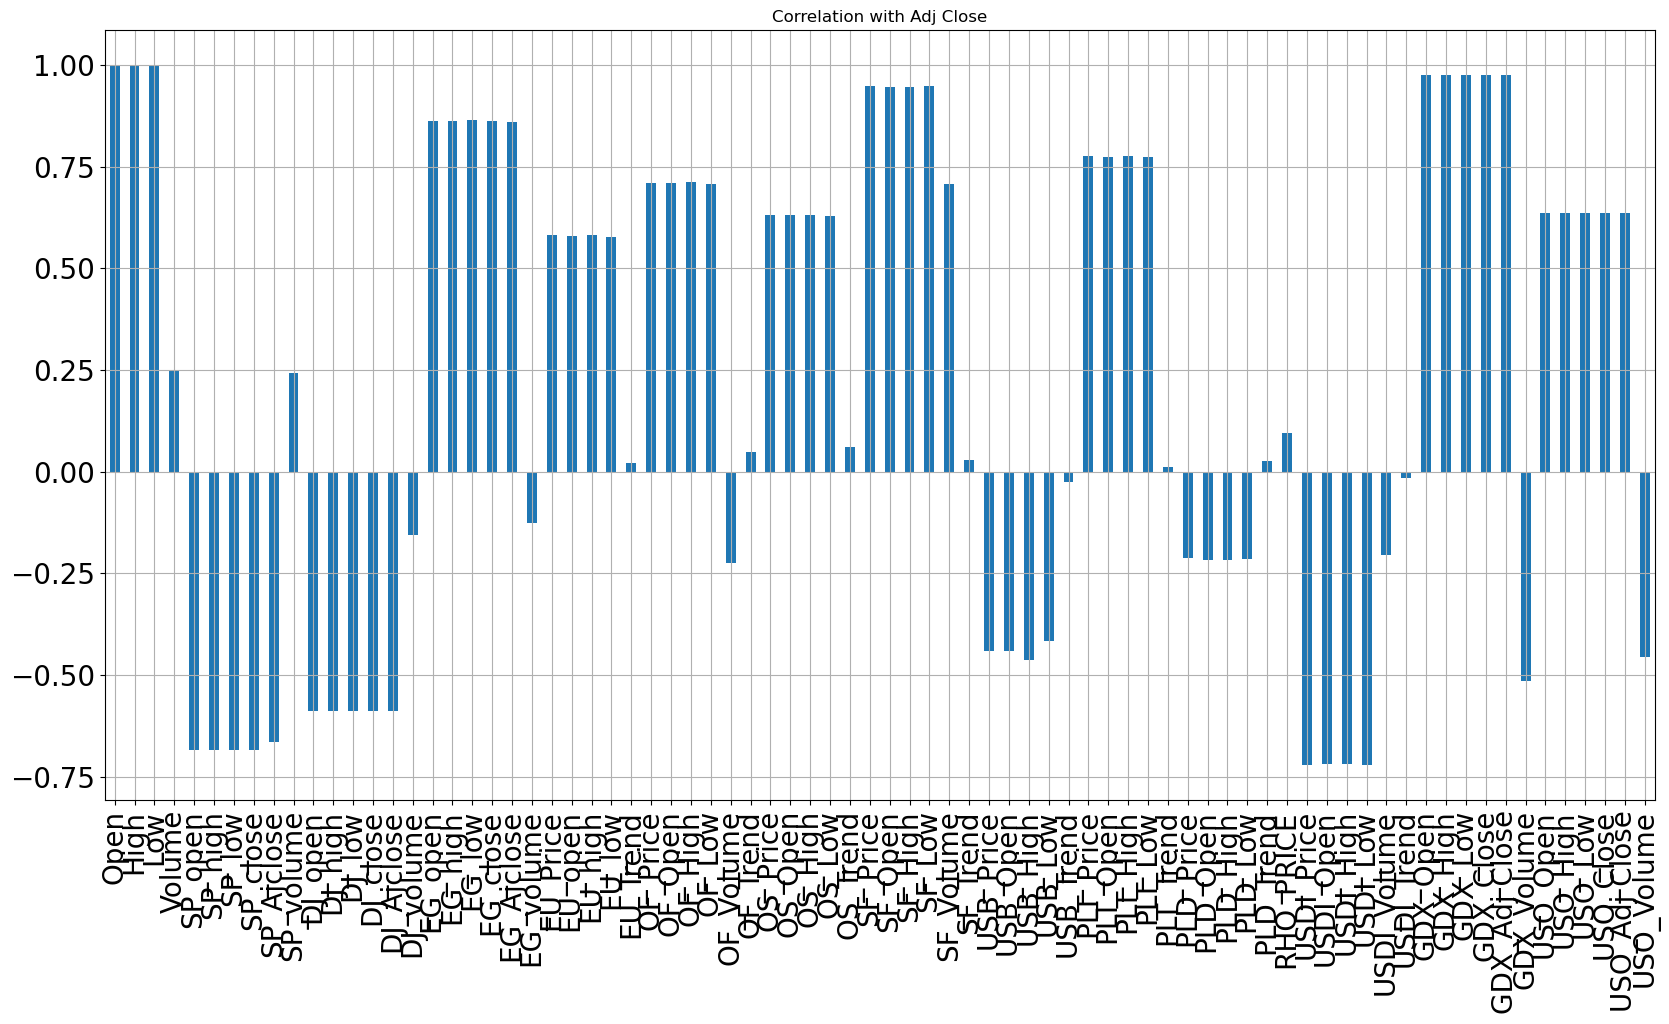

In [20]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [21]:
corr_matrix=df_final.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)?

SyntaxError: invalid syntax (3294318716.py, line 2)

In [22]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

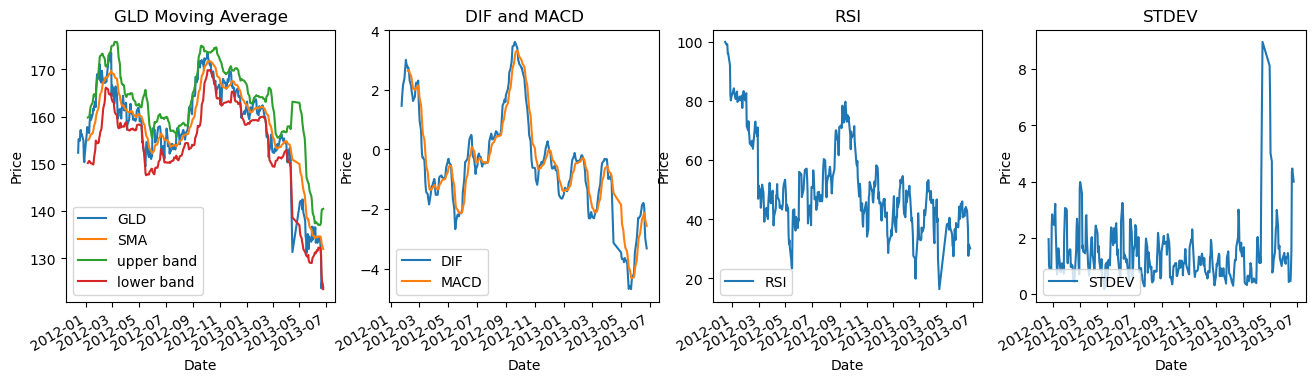

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=df_final.Open - df_final.Close

High_Low=df_final.High-df_final.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

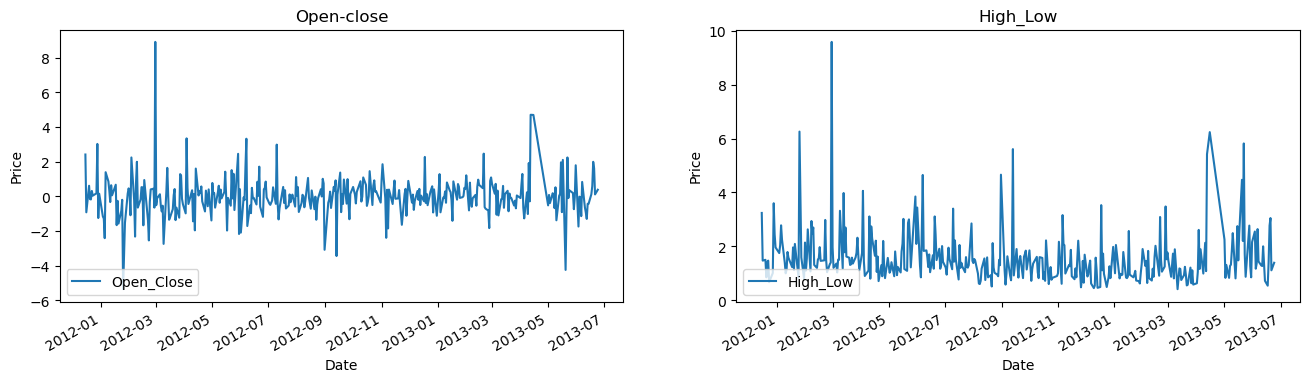

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=df_final.Open - df_final.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=df_final.High-df_final.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')




axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [25]:
test = df_final
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low


# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-02-06  166.960007  167.679993  166.610001  167.179993  167.179993   
2012-02-07  167.380005  170.089996  167.149994  169.699997  169.699997   
2012-02-08  169.259995  169.960007  167.500000  168.500000  168.500000   
2012-02-09  170.009995  170.369995  167.669998  168.020004  168.020004   
2012-02-10  166.490005  167.639999  166.330002  167.139999  167.139999   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2012-02-06   8807400  133.979996  134.509995  133.830002  134.449997  ...   
2012-02-07  11614300  134.169998  135.020004  133.639999  134.789993  ...   
2012-02-08  10655500  134.860001  135.220001  134.309998  135.190002  ...   
2012-02-09  16085200  135.410004  135.589996  134.559998  135.360001  ...   
2012-02-10  10326800  134.160004  134.470001  133.839996  134.360001  ...   

            USO_Volume         SMA  Upper_band  Lower_band       DIF  \
Date                                                                   
2012-02-06     6126100  165.198666  173.018365  157.378968  2.724443   
2012-02-07    10237000  165.894667  173.296304  158.493029  2.754381   
2012-02-08     9045800  166.428000  173.297467  159.558533  2.655845   
2012-02-09     4663500  166.856000  173.217507  160.494493  2.511947   
2012-02-10     6008600  167.250666  172.795817  161.705515  2.303734   

                MACD        RSI     STDEV  Open_Close  High_Low  
Date                                                             
2012-02-06  2.641891  70.144545  1.562107   -0.219986  1.069992  
2012-02-07  2.667095  73.152763  1.594111   -2.319992  2.940002  
2012-02-08  2.664634  69.576023  1.575718    0.759995  2.460007  
2012-02-09  2.631843  68.148015  0.965153    1.989991  2.699997  
2012-02-10  2.562404  65.507009  1.059963   -0.649994  1.309997  

[5 rows x 89 columns]

In [27]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume','SP_open','SP_high','SP_low','SP_Ajclose','SP_volume','DJ_open','DJ_high', 'DJ_low',  'DJ_Ajclose', 'DJ_volume', 'EG_open','EG_high', 'EG_low',  
                   'EG_Ajclose', 'EG_volume', 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price','OF_Open','OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open','OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
                   'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
                    'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
                     'USDI_Low', 'USDI_Volume', 'USDI_Trend','GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume','SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD','RSI','STDEV','Open_Close', 'High_Low']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

Open      High       Low    Volume   SP_open   SP_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.079151  0.037098  0.034927   
2012-02-07  0.919480  0.945539  0.920622  0.109560  0.038247  0.038015   
2012-02-08  0.945490  0.943760  0.925437  0.099173  0.042423  0.039225   
2012-02-09  0.955866  0.949370  0.927775  0.157998  0.045752  0.041465   
2012-02-10  0.907167  0.912014  0.909341  0.095612  0.038187  0.034685   

              SP_low  SP_Ajclose  SP_volume   DJ_open  ...  USO_Volume  \
Date                                                   ...               
2012-02-06  0.040627    0.028113   0.166542  0.051563  ...    0.046608   
2012-02-07  0.039473    0.029765   0.224602  0.050453  ...    0.084243   
2012-02-08  0.043542    0.031707   0.232599  0.051907  ...    0.073338   
2012-02-09  0.045060    0.032533   0.251876  0.053171  ...    0.033218   
2012-02-10  0.040687    0.027676   0.292146  0.053519  ...    0.045532   

                 SMA  Upper_band  Lower_band       DIF      MACD       RSI  \
Date                                                                         
2012-02-06  0.906189    0.961240    0.821988  0.893394  0.911893  0.807275   
2012-02-07  0.916193    0.965092    0.837893  0.896986  0.915193  0.852413   
2012-02-08  0.923859    0.965108    0.853105  0.885164  0.914871  0.798744   
2012-02-09  0.930011    0.964000    0.866467  0.867900  0.910578  0.777317   
2012-02-10  0.935684    0.958155    0.883757  0.842920  0.901486  0.737688   

               STDEV  Open_Close  High_Low  
Date                                        
2012-02-06  0.167603    0.415010  0.091684  
2012-02-07  0.171198    0.280308  0.291045  
2012-02-08  0.169132    0.477870  0.239873  
2012-02-09  0.100533    0.556766  0.265458  
2012-02-10  0.111185    0.387428  0.117271  

[5 rows x 84 columns]

In [29]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

Open      High       Low    Volume   SP_open   SP_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.079151  0.037098  0.034927   
2012-02-07  0.919480  0.945539  0.920622  0.109560  0.038247  0.038015   
2012-02-08  0.945490  0.943760  0.925437  0.099173  0.042423  0.039225   
2012-02-09  0.955866  0.949370  0.927775  0.157998  0.045752  0.041465   
2012-02-10  0.907167  0.912014  0.909341  0.095612  0.038187  0.034685   

              SP_low  SP_Ajclose  SP_volume   DJ_open  ...  USO_Volume  \
Date                                                   ...               
2012-02-06  0.040627    0.028113   0.166542  0.051563  ...    0.046608   
2012-02-07  0.039473    0.029765   0.224602  0.050453  ...    0.084243   
2012-02-08  0.043542    0.031707   0.232599  0.051907  ...    0.073338   
2012-02-09  0.045060    0.032533   0.251876  0.053171  ...    0.033218   
2012-02-10  0.040687    0.027676   0.292146  0.053519  ...    0.045532   

                 SMA  Upper_band  Lower_band       DIF      MACD       RSI  \
Date                                                                         
2012-02-06  0.906189    0.961240    0.821988  0.893394  0.911893  0.807275   
2012-02-07  0.916193    0.965092    0.837893  0.896986  0.915193  0.852413   
2012-02-08  0.923859    0.965108    0.853105  0.885164  0.914871  0.798744   
2012-02-09  0.930011    0.964000    0.866467  0.867900  0.910578  0.777317   
2012-02-10  0.935684    0.958155    0.883757  0.842920  0.901486  0.737688   

               STDEV  Open_Close  High_Low  
Date                                        
2012-02-06  0.167603    0.415010  0.091684  
2012-02-07  0.171198    0.280308  0.291045  
2012-02-08  0.169132    0.477870  0.239873  
2012-02-09  0.100533    0.556766  0.265458  
2012-02-10  0.111185    0.387428  0.117271  

[5 rows x 84 columns]

Shape of features :  (1685, 84)
Shape of target :  (1685, 1)


Open      High       Low    Volume   SP_open   SP_high  \
Date                                                                     
2018-12-21  0.252767  0.249863  0.252304  0.131396  0.719499  0.732264   
2018-12-24  0.258024  0.262042  0.266061  0.089215  0.672900  0.678571   
2018-12-26  0.272551  0.273810  0.266061  0.138587  0.654321  0.710896   
2018-12-27  0.271859  0.272441  0.273903  0.112378  0.694263  0.723668   
2018-12-28  0.275042  0.274904  0.281882  0.058103  0.736686  0.742494   

              SP_low  SP_Ajclose  SP_volume   DJ_open  ...  USO_Volume  \
Date                                                   ...               
2018-12-21  0.685249    0.721173   0.474541  0.731087  ...    0.346662   
2018-12-24  0.650574    0.685607   0.249183  0.693452  ...    0.188254   
2018-12-26  0.647477    0.751818   0.397651  0.662258  ...    0.365682   
2018-12-27  0.679055    0.762387   0.330444  0.714615  ...    0.325400   
2018-12-28  0.724540    0.760598   0.261258  0.754292  ...    0.199288   

                 SMA  Upper_band  Lower_band       DIF      MACD       RSI  \
Date                                                                         
2018-12-21  0.221370    0.217009    0.228105  0.658641  0.648503  0.687759   
2018-12-24  0.225663    0.221905    0.231591  0.673309  0.655308  0.771343   
2018-12-26  0.228778    0.225424    0.234153  0.680140  0.662243  0.728779   
2018-12-27  0.232083    0.233069    0.232846  0.692906  0.670576  0.782400   
2018-12-28  0.235840    0.241125    0.232010  0.706157  0.680136  0.808642   

               STDEV  Open_Close  High_Low  
Date                                        
2018-12-21  0.071990    0.459268  0.050107  
2018-12-24  0.103731    0.400256  0.038380  
2018-12-26  0.105509    0.490699  0.130064  
2018-12-27  0.071859    0.429121  0.058636  
2018-12-28  0.092629    0.412444  0.015992  

[5 rows x 84 columns]

Adj Close
Date                  
2018-12-21  120.019997
2018-12-24  119.660004
2018-12-26  120.570000
2018-12-27  121.059998
2018-12-28  121.250000


 -----After process------ 

Shape of features :  (1595, 84)
Shape of target :  (1595, 1)


Adj Close
Date                  
2018-08-13  113.070000
2018-08-14  111.099998
2018-08-16  112.129997
2018-08-17  112.690002
2018-08-20  113.019997

In [30]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
       

In [31]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  1.2166871700124942
R2 score:  0.6590361406118342


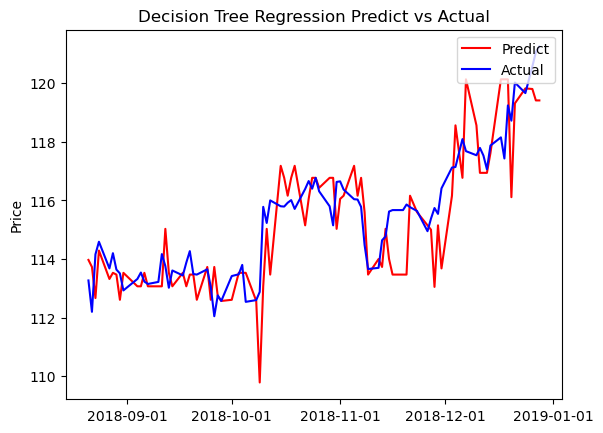

In [32]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

RMSE:  0.8136915781864802
R2 score:  0.8474998982809431


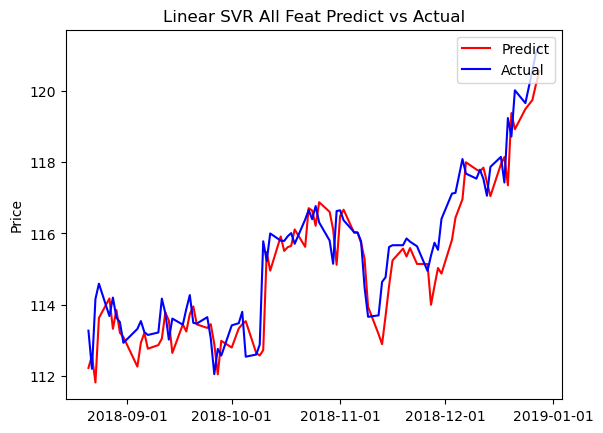

In [33]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')

RMSE:  0.7417766706120958
R2 score:  0.8732649232932841


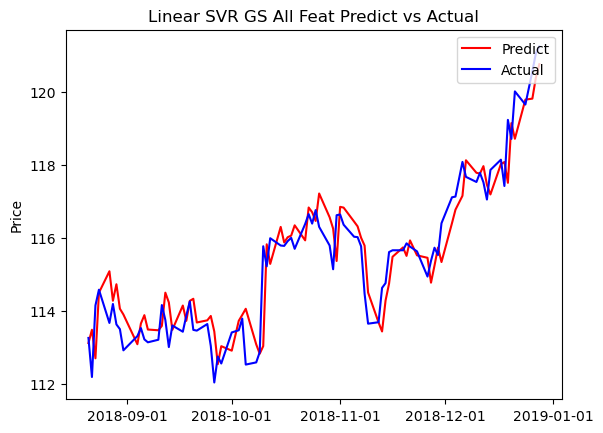

In [39]:
##Hyper parameter tuning
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')

RMSE:  0.8078828885891266
R2 score:  0.8496694277726002


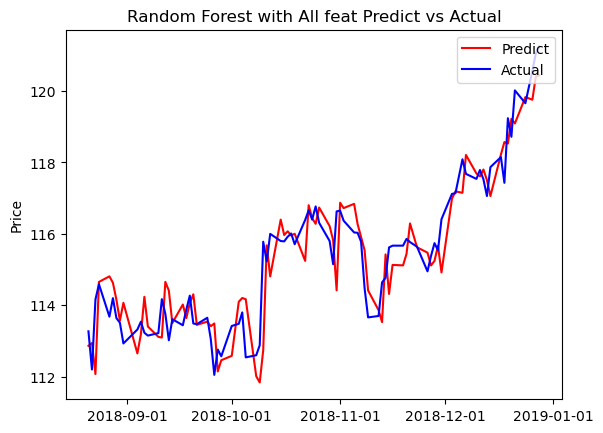

In [42]:
##Random Forest
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')